<h3>Roshan Srivastava <br>
J047 MBA Tech. EXTC SEM 7

Experiment 1 <br>
Aim: To convert imbalanced dataset to balanced dataset
</h3>

In [4]:
import imblearn #library function for imbalanced dataset
from collections import Counter #used to tell us each class has how many samples
from sklearn.datasets import make_classification #trying to generate samples of our choices
#make_classification - used to generate dataset
import matplotlib.pyplot as plt 
import numpy as np #where - apply some conditions to the samples

In [5]:
x, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y = 0, random_state = 1)
#flip_y -indicates that samples shouldn't be mixed
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


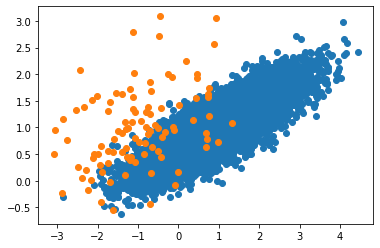

In [8]:
for lab,_ in counter.items():
  rows = np.where(y == lab)
  plt.scatter(x[rows, 0], x[rows, 1], label = str(lab))
  #blue - represents class 0
  #orange - represents class 1

In [9]:
print(x[0,:],y[0],x[10, :],y[10])

[0.22201371 0.54020654] 0 [1.19261662 0.74978411] 0


In [10]:
from imblearn.over_sampling import SMOTE #SMOTE - helps to convert imbalance dataset to balance dataset

Counter({0: 9900, 1: 9900})


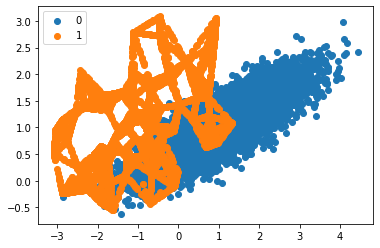

In [13]:
x, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y = 0, random_state = 1)
over_s = SMOTE()
x, y = over_s.fit_resample(x,y)
counter = Counter(y)
print(counter)

for lab,_ in counter.items():
  rows = np.where(y == lab)
  plt.scatter(x[rows,0], x[rows,1], label = str(lab))
  plt.legend()
#no separability between two classes

In [12]:
from imblearn.under_sampling import RandomUnderSampler #corresponds to the desired ratio
from imblearn.pipeline import Pipeline #consists of 2 steps - build and fit

In [14]:
x, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y = 0, random_state = 1)
over_s = SMOTE(sampling_strategy = 0.1)
under_s = RandomUnderSampler(sampling_strategy = 0.5)
#controlling both minority and majority samples^
S = [('o', over_s), ('u', under_s)]
pipeline = Pipeline(steps = S)
x, y = pipeline.fit_resample(x, y)

Counter({0: 1980, 1: 990})


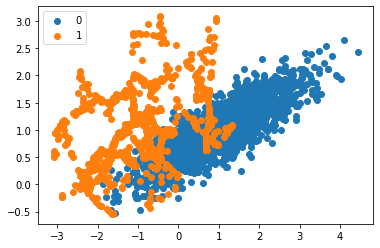

In [15]:
counter = Counter(y)
print(counter)

for lab,_ in counter.items():
  rows = np.where(y == lab)
  plt.scatter(x[rows,0], x[rows,1], label = str(lab))
  plt.legend()

In [16]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [17]:
x, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y = 0, random_state = 1)
model = DecisionTreeClassifier()
croval = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
score = cross_val_score(model, x, y, scoring = 'roc_auc', cv = croval)
mean_roc_auc = mean(score)
print(mean_roc_auc)

0.764090909090909


In [19]:
x, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y = 0, random_state = 1)
S = [('o', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps = S)

croval = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
score = cross_val_score(pipeline, x, y, scoring = 'roc_auc', cv = croval)
mean_roc_auc = mean(score)
print(mean_roc_auc)

0.8240909090909089


In [20]:
x, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], random_state = 1)
model = DecisionTreeClassifier()
over_s = SMOTE(sampling_strategy = 0.1)
under_s = RandomUnderSampler(sampling_strategy = 0.5)
S = [('over', over_s), ('under', under_s), ('model',model)]

In [22]:
pipeline = Pipeline(steps = S)

croval = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
score = cross_val_score(pipeline, x, y, scoring = 'roc_auc', cv = croval)
print(mean_roc_auc)

0.8240909090909089


<h1>Conclusion</h1>
<h3>

1. The given dataset is imbalanced dataset. It has 99% of the samples under majority class and remaining samples are in minority class. Area under the curve for the given dataset is 0.76.

2. Imbalanced dataset is converted to balanced dataset using SMOTE which comes under the techniques of oversampling. Area under the curve increases to 0.82.

3. Dataset is oversampled using SMOTE, followed by undersampling using RandomUnderSampler. The area under the curve improves/increases to 0.84. Because UnderSampler reduces mixes of majority and minority class samples. 
</h3>
